In [14]:
import torch
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [15]:
import importlib
import exercise1 as ex1
importlib.reload(ex1);

In [16]:
# Problem constants for SDE: dX = (HX + Ma) dt + sigma dW
H = torch.tensor([[1.0, 1.0], [0.0, 1.0]]) * 0.5
M = torch.tensor([[1.0, 1.0], [0.0, 1.0]]) * 1.0
C = torch.tensor([[1.0, 0.1], [0.1, 1.0]]) * 1.0
D = torch.tensor([[1.0, 0.1], [0.1, 1.0]]) * 0.1
R = torch.tensor([[1.0, 0.3], [0.3, 1.0]]) * 10.0
sigma = torch.eye(2) * 0.5

T = 0.5
N = 1000
t = 0.0
x = torch.tensor([1.0, 1.0])

In [17]:
importlib.reload(ex1);

# Initialize LQR object
lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
lqr.solve_riccati()
lqr.value(t,x)
lqr.optimal_control(t,x)

value at t = 0.0 , x = tensor([1., 1.]) : tensor([0.7797])
optimal control at t = 0.0 , x = tensor([1., 1.]) : tensor([-1.2770, -5.1996])


tensor([-1.2770, -5.1996])

In [18]:
importlib.reload(ex1);

N = 1000
L = 1000
T = 0.5 
t = 0.0
x = torch.tensor([1.0, 1.0])

# Initialize LQR object
lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
lqr.solve_riccati()
lqr.value(t,x)
lqr.optimal_control(t,x)

# Monte Carlo simulation with L = 1000 samples, averaged over 10 runs
ex1.MC_estimate_multiple_runs(lqr, L, N, T, t, x, num_runs=10)

value at t = 0.0 , x = tensor([1., 1.]) : tensor([0.7797])
optimal control at t = 0.0 , x = tensor([1., 1.]) : tensor([-1.2770, -5.1996])
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.7807


tensor(0.7807)

In [19]:
importlib.reload(ex1);

L = 1000
T = 0.5 
t = 0.1
x = torch.tensor([1.0, 1.0])*2

# Initialize LQR object
lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
lqr.solve_riccati()
lqr.value(t,x)
lqr.optimal_control(t,x)

# Monte Carlo simulation with L = 1000 samples, averaged over 10 runs
ex1.MC_estimate_multiple_runs(lqr, L, N, T, t, x)

value at t = 0.1 , x = tensor([2., 2.]) : tensor([2.4117])
optimal control at t = 0.1 , x = tensor([2., 2.]) : tensor([ -2.3950, -10.6902])
MC estimate of value function at t = 0.1, x = tensor([2., 2.]), averaged over 10 runs: 1.0564


tensor(1.0564)

value at t = 0.0 , x = tensor([1., 1.]) : tensor([0.7819])
N = 2
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 66.7378
N = 4
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 1.2882
N = 8
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.9314
N = 16
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.8330
N = 32
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.7964
N = 64
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.7839
N = 128
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.7802
N = 256
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.7812
N = 512
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 10 runs: 0.7810
N = 1024
MC estimate of value f

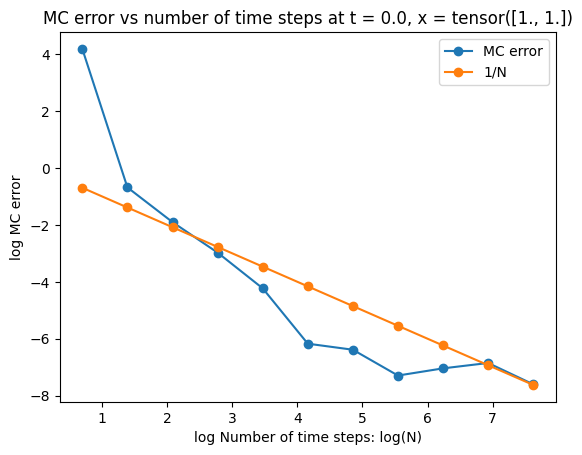

In [ ]:
# This code block runs for ~2min

importlib.reload(ex1);

L = 20000
T = 0.5 
t = 0.0
x = torch.tensor([1.0, 1.0])

# MC error vs number of time steps N

N_values = np.array([2**i for i in range(1, 12)]) # Number of time steps for MC simulation
MC_errors = np.zeros(len(N_values))

N_true = 10000 # Number of time steps used to solve the Riccati ODE
lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N_true)
true_value = lqr.value(t, x) # Value function calculated using the Riccati ODE

for i, N in enumerate(N_values):
    lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
    print(f'N = {N}')
    MC_errors[i] = abs(true_value - ex1.MC_estimate_multiple_runs(lqr, L, N, T, t, x, num_runs=10))

plt.plot(np.log(N_values), np.log(MC_errors), 'o-', label='MC error')
plt.plot(np.log(N_values), np.log(1/N_values), 'o-', label='1/N')
plt.xlabel('log Number of time steps: log(N)')
plt.ylabel('log MC error')
plt.title(f'MC error vs number of time steps at t = {t}, x = {x}')
plt.legend()
# plt.savefig('MC_vs_N_1.png')
plt.show()


value at t = 0.0 , x = tensor([2., 2.]) : tensor([2.3779])
N = 2
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 259.2296
N = 4
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.2722
N = 8
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.2208
N = 16
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.2896
N = 32
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.3284
N = 64
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.3486
N = 128
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.3626
N = 256
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.3719
N = 512
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 10 runs: 2.3749
N = 1024
MC estimate of value 

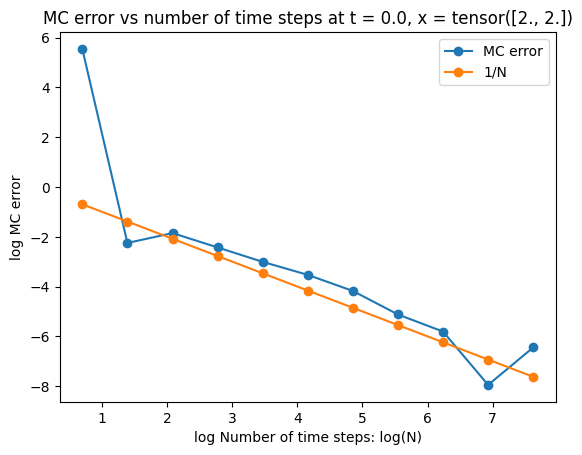

In [ ]:
# This code block runs for ~2min

importlib.reload(ex1);

L = 20000
T = 0.5 
t = 0.0
x = torch.tensor([1.0, 1.0])*2

# MC error vs number of time steps

N_values = np.array([2**i for i in range(1, 12)]) # Number of time steps for MC simulation
MC_errors = np.zeros(len(N_values))

N_true = 1000 # Number of time steps used to solve the Riccati ODE
lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N_true)
true_value = lqr.value(t, x) # Value function calculated using the Riccati ODE

for i, N in enumerate(N_values):
    lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
    print(f'N = {N}')
    MC_errors[i] = abs(true_value - ex1.MC_estimate_multiple_runs(lqr, L, N, T, t, x, num_runs=10))

plt.plot(np.log(N_values), np.log(MC_errors), 'o-', label='MC error')
plt.plot(np.log(N_values), np.log(1/N_values), 'o-', label='1/N')
plt.xlabel('log Number of time steps: log(N)')
plt.ylabel('log MC error')
plt.title(f'MC error vs number of time steps at t = {t}, x = {x}')
plt.legend()
# plt.savefig('MC_vs_N_2.png')
plt.show()

value at t = 0.0 , x = tensor([1., 1.]) : tensor([0.7819])
Running MC simulation with L = 2
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 30 runs: 0.8558
Running MC simulation with L = 8
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 30 runs: 0.7636
Running MC simulation with L = 32
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 30 runs: 0.7927
Running MC simulation with L = 128
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 30 runs: 0.7791
Running MC simulation with L = 512
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 30 runs: 0.7849
Running MC simulation with L = 2048
MC estimate of value function at t = 0.0, x = tensor([1., 1.]), averaged over 30 runs: 0.7819


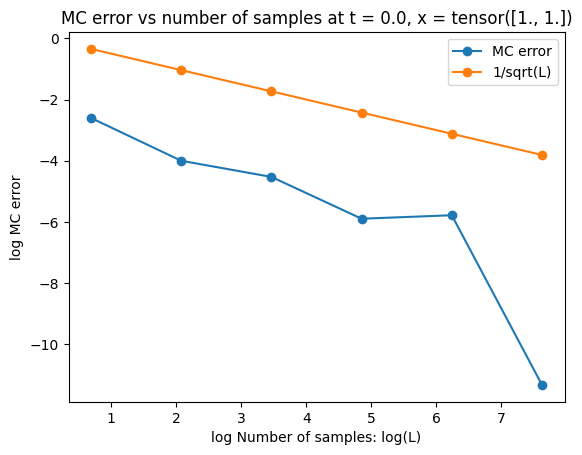

In [ ]:
# This code block runs for ~3min

importlib.reload(ex1);

# MC error vs number of samples
N = 10000
T = 0.5 
t = 0.0
x = torch.tensor([1.0, 1.0])

L_values = [2*4**i for i in range(0, 6)] # Number of samples for MC simulation
MC_errors = np.zeros(len(L_values))
std = np.zeros(len(L_values))

lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
true_value = lqr.value(t, x) # Value function calculated using the Riccati ODE

for i, L in enumerate(L_values):
    print(f'Running MC simulation with L = {L}')
    MC_errors[i] = abs(true_value - ex1.MC_estimate_multiple_runs(lqr, L, N, T, t, x, num_runs=30))

plt.plot(np.log(L_values), np.log(MC_errors), 'o-', label='MC error')
plt.plot(np.log(L_values), np.log(1/np.sqrt(L_values)), 'o-', label='1/sqrt(L)')
plt.xlabel('log Number of samples: log(L)')
plt.ylabel('log MC error')
plt.title(f'MC error vs number of samples at t = {t}, x = {x}')
plt.legend()
# plt.savefig('MC_vs_L_1.png')
plt.show()

value at t = 0.0 , x = tensor([2., 2.]) : tensor([2.3800])
Running MC simulation with L = 2
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 30 runs: 2.4142
Running MC simulation with L = 8
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 30 runs: 2.3591
Running MC simulation with L = 32
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 30 runs: 2.3561
Running MC simulation with L = 128
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 30 runs: 2.3824
Running MC simulation with L = 512
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 30 runs: 2.3838
Running MC simulation with L = 2048
MC estimate of value function at t = 0.0, x = tensor([2., 2.]), averaged over 30 runs: 2.3787


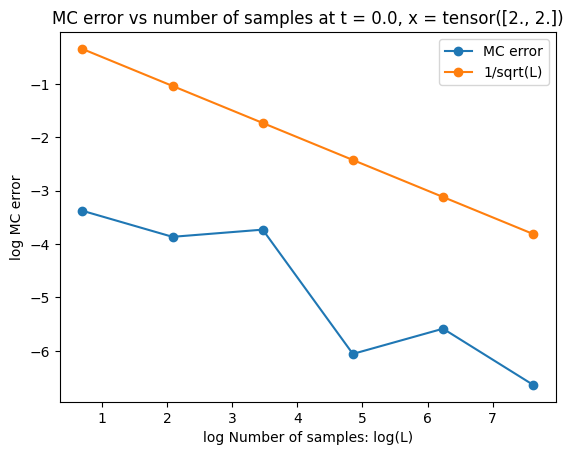

In [ ]:
# This code block runs for ~3min

importlib.reload(ex1);

# MC error vs number of samples
N = 10000
T = 0.5 
t = 0.0
x = torch.tensor([1.0, 1.0])*2

L_values = [2*4**i for i in range(0, 6)] # Number of samples for MC simulation
MC_errors = np.zeros(len(L_values))
std = np.zeros(len(L_values))

lqr = ex1.LQR(H, M, C, D, R, sigma, t, T, N)
true_value = lqr.value(t, x) # Value function calculated using the Riccati ODE

for i, L in enumerate(L_values):
    print(f'Running MC simulation with L = {L}')
    MC_errors[i] = abs(true_value - ex1.MC_estimate_multiple_runs(lqr, L, N, T, t, x, num_runs=30))

plt.plot(np.log(L_values), np.log(MC_errors), 'o-', label='MC error')
plt.plot(np.log(L_values), np.log(1/np.sqrt(L_values)), 'o-', label='1/sqrt(L)')
plt.xlabel('log Number of samples: log(L)')
plt.ylabel('log MC error')
plt.title(f'MC error vs number of samples at t = {t}, x = {x}')
plt.legend()
# plt.savefig('MC_vs_L_2.png')
plt.show()